<a href="https://colab.research.google.com/github/thotla-vandith/DL-Lesson3/blob/master/DL_ICP3(sentiment_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%tensorflow_version 1.x
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
df = pd.read_csv('drive/My Drive/Python Colab/DL_Lesson3/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


###  Tokenizing the data.

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

### Acquiring vocabulary of the data.


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [0]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [0]:
model = Sequential()

In [0]:
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 4s 54us/step - loss: 0.8821 - acc: 0.5026 - val_loss: 0.8418 - val_acc: 0.5142
Epoch 2/5
75000/75000 [==============================] - 4s 52us/step - loss: 0.7890 - acc: 0.5787 - val_loss: 0.8549 - val_acc: 0.5000
Epoch 3/5
75000/75000 [==============================] - 4s 52us/step - loss: 0.6823 - acc: 0.6821 - val_loss: 0.8764 - val_acc: 0.5184
Epoch 4/5
75000/75000 [==============================] - 4s 53us/step - loss: 0.4845 - acc: 0.8250 - val_loss: 0.9562 - val_acc: 0.5047
Epoch 5/5
75000/75000 [==============================] - 4s 52us/step - loss: 0.2734 - acc: 0.9325 - val_loss: 1.0738 - val_acc: 0.5007


In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)


176408
2470


In [0]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 209s 3ms/step - loss: 1.0655 - acc: 0.4890 - val_loss: 0.8689 - val_acc: 0.5002
Epoch 2/5
75000/75000 [==============================] - 213s 3ms/step - loss: 0.8442 - acc: 0.5179 - val_loss: 0.8692 - val_acc: 0.4997
Epoch 3/5
75000/75000 [==============================] - 209s 3ms/step - loss: 0.7941 - acc: 0.5554 - val_loss: 0.8528 - val_acc: 0.5037
Epoch 4/5
75000/75000 [==============================] - 212s 3ms/step - loss: 0.7201 - acc: 0.6274 - val_loss: 0.8876 - val_acc: 0.4970
Epoch 5/5
75000/75000 [==============================] - 209s 3ms/step - loss: 0.6141 - acc: 0.7090 - val_loss: 0.9694 - val_acc: 0.4857


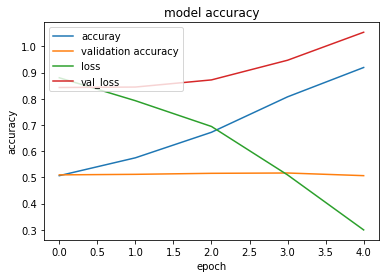

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)


In [0]:
sentences= twenty_train.data
y=twenty_train.target

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)


In [0]:
from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [0]:
h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 111s 13ms/step - loss: 2.5651 - acc: 0.1622 - val_loss: 2.5692 - val_acc: 0.1453
Epoch 2/5
8485/8485 [==============================] - 111s 13ms/step - loss: 2.4010 - acc: 0.2293 - val_loss: 2.4741 - val_acc: 0.1647
Epoch 3/5
8485/8485 [==============================] - 110s 13ms/step - loss: 2.2545 - acc: 0.2834 - val_loss: 2.3912 - val_acc: 0.2075
Epoch 4/5
8485/8485 [==============================] - 112s 13ms/step - loss: 2.0794 - acc: 0.3604 - val_loss: 2.3373 - val_acc: 0.2177
Epoch 5/5
8485/8485 [==============================] - 110s 13ms/step - loss: 1.8666 - acc: 0.4392 - val_loss: 2.2407 - val_acc: 0.2382


In [0]:
x=model.predict_classes(X_test[[1],:])

In [0]:
print("Actual Prediction",y_test[1],"Predicted Prediction",x)

Actual Prediction 2 Predicted Prediction [2]


In [0]:
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="/content/drive/My Drive/Python Colab/DL_Lesson3/log_files/{}".format(time()))
model.fit(X_train,y_train,verbose=1,callbacks=[tensorboard], epochs=5)

75000/75000 [==============================] - 15s 197us/step - loss: 0.4303 - acc: 0.8250
Epoch 2/5
75000/75000 [==============================] - 15s 195us/step - loss: 0.1756 - acc: 0.9474
Epoch 3/5
75000/75000 [==============================] - 15s 194us/step - loss: 0.1247 - acc: 0.9689
Epoch 4/5
75000/75000 [==============================] - 15s 194us/step - loss: 0.1098 - acc: 0.9739
Epoch 5/5
75000/75000 [==============================] - 15s 194us/step - loss: 0.0958 - acc: 0.9785
